In [2]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv('../data/compas-scores-two-years.csv', index_col=0)
df

,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
id,,,,,,,,,,,,,,,,,,,,,
1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,0,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,0,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,0,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0


In [43]:
for col in df.columns:
    vals = df[col].unique()
    content = '; '.join([str(v) for v in vals]) if len(vals) < 10 else '*'
    typ = str(df[col].dtype)
    print(f'{col:24} - {typ:8} - {content}')

name                     - object   - *
first                    - object   - *
last                     - object   - *
compas_screening_date    - object   - *
sex                      - object   - Male; Female
dob                      - object   - *
age                      - int64    - *
age_cat                  - object   - Greater than 45; 25 - 45; Less than 25
race                     - object   - Other; African-American; Caucasian; Hispanic; Native American; Asian
juv_fel_count            - int64    - *
decile_score             - int64    - *
juv_misd_count           - int64    - *
juv_other_count          - int64    - *
priors_count             - int64    - *
days_b_screening_arrest  - float64  - *
c_jail_in                - object   - *
c_jail_out               - object   - *
c_case_number            - object   - *
c_offense_date           - object   - *
c_arrest_date            - object   - *
c_days_from_compas       - float64  - *
c_charge_degree          - object   - F; M
c_

In [49]:
df.loc[1]

name                                   miguel hernandez
first                                            miguel
last                                          hernandez
compas_screening_date                        2013-08-14
sex                                                Male
dob                                          1947-04-18
age                                                  69
age_cat                                 Greater than 45
race                                              Other
juv_fel_count                                         0
decile_score                                          1
juv_misd_count                                        0
juv_other_count                                       0
priors_count                                          0
days_b_screening_arrest                            -1.0
c_jail_in                           2013-08-13 06:03:42
c_jail_out                          2013-08-14 05:41:20
c_case_number                             130113

Some notes on the columns:
- Prefix `c` seems to indicate columns associated with the initial case/charge
- Prefix `r` seems to indicate columns associated with recidivism case
- Prefix `v` seems to indicate columns associated with Risk of violence assessment
- Prefix `vr` seems to indicate columns associated with violent recidivism case
- Certain columns have duplicate names: `decile_score`, `priors_count`

In [52]:
print('Rows with decile_score != decile_score.1: ', df[df['decile_score'] != df['decile_score.1']].shape[0])
print('Rows with priors_count != priors_count.1: ', df[df['priors_count'] != df['priors_count.1']].shape[0])

Rows with decile_score != decile_score.1:  0
Rows with priors_count != priors_count.1:  0


In [55]:
group_columns = {
 'name': 'pers',
 'first': 'pers',
 'last': 'pers',
 'compas_screening_date': 'recid_ass',
 'sex': 'pers',
 'dob': 'pers',
 'age': 'pers',
 'age_cat': 'pers',
 'race': 'pers',
 'juv_fel_count': 'prior',
 'decile_score': 'recid_ass',
 'juv_misd_count': 'prior',
 'juv_other_count': 'prior',
 'priors_count': 'prior',
 'days_b_screening_arrest': 'recid_ass',
 'c_jail_in': 'case',
 'c_jail_out': 'case',
 'c_case_number': 'case',
 'c_offense_date': 'case',
 'c_arrest_date': 'case',
 'c_days_from_compas': 'case',
 'c_charge_degree': 'case',
 'c_charge_desc': 'case',
 'is_recid': 'recid',
 'r_case_number': 'recid',
 'r_charge_degree': 'recid',
 'r_days_from_arrest': 'recid',
 'r_offense_date': 'recid',
 'r_charge_desc': 'recid',
 'r_jail_in': 'recid',
 'r_jail_out': 'recid',
 'violent_recid': 'violent_recid',
 'is_violent_recid': 'violent_recid',
 'vr_case_number': 'violent_recid',
 'vr_charge_degree': 'violent_recid',
 'vr_offense_date': 'violent_recid',
 'vr_charge_desc': 'violent_recid',
 'type_of_assessment': 'recid_ass',
 'decile_score.1': 'recid_ass',
 'score_text': 'recid_ass',
 'screening_date': 'recid_ass',
 'v_type_of_assessment': 'viol_ass',
 'v_decile_score': 'viol_ass',
 'v_score_text': 'viol_ass',
 'v_screening_date': 'viol_ass',
 'in_custody': 'unknown',
 'out_custody': 'unknown',
 'priors_count.1': 'prior',
 'start': 'unknown',
 'end': 'unknown',
 'event': 'unknown',
 'two_year_recid': 'unknown'
}

In [71]:
df2 = df.copy()
df2.columns = pd.MultiIndex.from_tuples([(group_columns[c], c) for c in df.columns])
df2.sort_index(axis=1, inplace=True)
df2.columns

MultiIndex([(         'case',           'c_arrest_date'),
            (         'case',           'c_case_number'),
            (         'case',         'c_charge_degree'),
            (         'case',           'c_charge_desc'),
            (         'case',      'c_days_from_compas'),
            (         'case',               'c_jail_in'),
            (         'case',              'c_jail_out'),
            (         'case',          'c_offense_date'),
            (         'pers',                     'age'),
            (         'pers',                 'age_cat'),
            (         'pers',                     'dob'),
            (         'pers',                   'first'),
            (         'pers',                    'last'),
            (         'pers',                    'name'),
            (         'pers',                    'race'),
            (         'pers',                     'sex'),
            (        'prior',           'juv_fel_count'),
            ( 

In [9]:
sdf = pd.DataFrame({
    'race': df.race.map(lambda r: "White" if r == "Caucasian" else "Non-White"),
    'sex': df.sex,
    'actual': df.two_year_recid == 1,
    'predicted': df.score_text != 'Low'
})
sdf

,race,sex,actual,predicted
id,,,,
1,Non-White,Male,False,False
3,Non-White,Male,True,False
4,Non-White,Male,True,False
5,Non-White,Male,False,True
6,Non-White,Male,False,False
...,...,...,...,...
10996,Non-White,Male,False,True
10997,Non-White,Male,False,False
10999,Non-White,Male,False,False


In [54]:
categorical = sdf.groupby(['race', 'sex']).sum()
categorical.T / categorical.T.sum()

race      Non-White               White          
sex          Female      Male    Female      Male
actual     0.448949  0.486526  0.470449  0.549034
predicted  0.551051  0.513474  0.529551  0.450966

In [49]:
s = categorical.groupby(level="sex").sum().T
s / s.sum()

sex,Female,Male
actual,0.4573,0.502464
predicted,0.5427,0.497536


In [50]:
r = categorical.groupby(level="race").sum().T
r / r.sum()

race,Non-White,White
actual,0.481255,0.530769
predicted,0.518745,0.469231


In [56]:
mdf = pd.DataFrame({
    'race': df.race.map(lambda r: "White" if r == "Caucasian" else "Non-White"),
    'sex': df.sex,
    'decile_score': df.decile_score
})
mdf

,race,sex,decile_score
id,,,
1,Non-White,Male,1
3,Non-White,Male,3
4,Non-White,Male,4
5,Non-White,Male,8
6,Non-White,Male,1
...,...,...,...
10996,Non-White,Male,7
10997,Non-White,Male,3
10999,Non-White,Male,1


<AxesSubplot:xlabel='decile_score'>

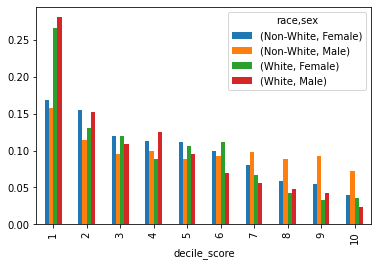

In [93]:
# from matplotlib import pyplot as plt
# mdf.groupby(['race', 'sex']).mean()
t = mdf.copy()
t['count'] = 1
t = t.groupby(['race', 'sex', 'decile_score']).count()['count'].unstack(level=[0, 1])
t = t / t.sum()
t.plot.bar()

<AxesSubplot:xlabel='decile_score'>

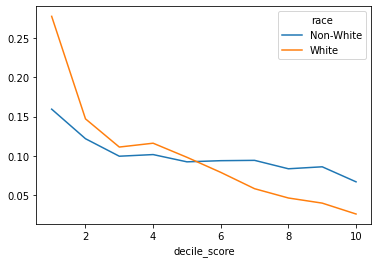

In [99]:
t = mdf.copy()
t['count'] = 1
t = t.groupby(['race', 'decile_score']).count()['count'].unstack(level=0)
t = t / t.sum()
t.plot()

<AxesSubplot:xlabel='decile_score'>

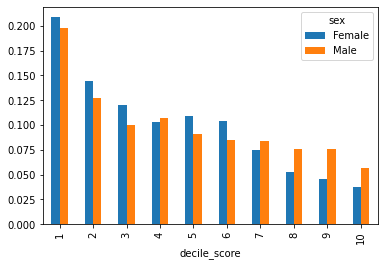

In [98]:
t = mdf.copy()
t['count'] = 1
t = t.groupby(['sex', 'decile_score']).count()['count'].unstack(level=0)
t = t / t.sum()
t.plot.bar()